# Initialization

Interactive use of the `sc_qubits` library from a jupyter notebook starts with importing the `sc_qubits` library. Additional imports, e.g.,  `numpy` and the QuTiP library are optional.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import sc_qubits as qubit
import sc_qubits.utils.plotting as plot


import numpy as np
from qutip import *

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [2]:
import matplotlib as mpl
import matplotlib.backends.backend_pdf as mplpdf
import matplotlib.pyplot as plt

try:
    from labellines import labelLine, labelLines
    _labellines_enabled = True
except ImportError:
    _labellines_enabled = False

import sc_qubits.utils.constants as constants


mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['figure.dpi']= 150


# Flux qubit

$H_\text{sym}=-2E_\text{CJ}\partial_\phi^2+2E_{\text{C}\Sigma}(i\partial_\theta-n_g)^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J}$

In [7]:
# parameters for the flux qubit

fluxqubit = qubit.FluxQubit(
    EJ = 80.0,
    ECJ = 1.0,
    ECg = 50.0,
    alpha = 0.8,
    ng1 = 0.0,
    ng2 = 0.0,
    flux = 0.1,
    ncut = 15
)

In [8]:
fluxqubit

flux qubit without disorder in the two large junctions
 ———— PARAMETERS ————
ngm	: 0.0
ncut	: 15
ECJ	: 1.0
ng1	: 0.0
alpha	: 0.8
ECp	: 0.9803921568627451
ECm	: 0.38167938931297707
Cm	: 1.31
Cg	: 0.01
ECg	: 50.0
EJ	: 80.0
CJ	: 0.5
truncated_dim	: None
ng2	: 0.0
ngp	: 0.0
Cp	: 0.51
flux	: 0.1
Hilbert space dimension	: 961

### Potential energy for the flux qubit

(<Figure size 600x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c6cf181d0>)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


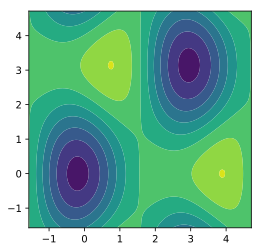

In [9]:
fluxqubit.plot_potential()

### Eigenenergies

In [50]:
evals = fluxqubit.eigenvals()

In [33]:
nm_vec = np.arange(-10, 10+1)
nm_vec.shape

(21,)

In [51]:
evals

array([-194.67012835, -194.67012835, -170.5625726 , -170.5625726 ,
       -170.55213571, -170.55213571])


[====================] 100% Done.


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


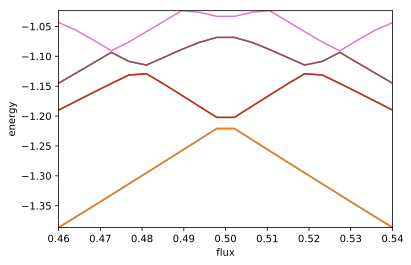

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efbaf362dd8>)

In [54]:
flux_list = np.linspace(0.46, .54, 20)
specdata = fluxqubit.get_spectrum_vs_paramvals('flux', flux_list, 8, False)
evals_vs_paramvals(specdata,shift=0)


[====================] 100% Done.


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


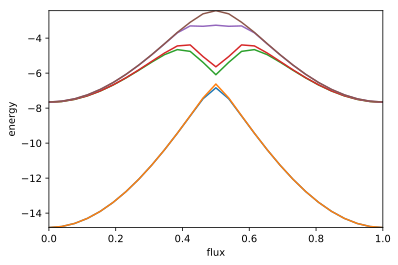

CPU times: user 9.85 s, sys: 30.3 s, total: 40.2 s
Wall time: 5.13 s


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efbaf7f6e48>)

In [25]:
%time fluxqubit.plot_evals_vs_paramvals('flux', flux_list, subtract_ground=False)

In [28]:
def evals_vs_paramvals(specdata, evals_count=-1, xlim=False, ylim=False, shift=0, filename=None,
                       fig_ax=None, **kwargs):
    if fig_ax is None:
        fig, axes = plt.subplots()
    else:
        fig, axes = fig_ax

    x = specdata.param_vals
    y = specdata.energy_table[:, 0:evals_count]/fluxqubit.EJ
    if xlim:
        axes.set_xlim(*xlim)
    else:
        axes.set_xlim(np.amin(x), np.amax(x))

    if ylim:
        axes.set_ylim(*ylim)
    else:
        axes.set_ylim(np.amin(y + shift), np.amax(y + shift))

    axes.set_xlabel(specdata.param_name)
    axes.set_ylabel('energy')
    axes.plot(x, y + shift, **kwargs)

    if filename:
        out_file = mplpdf.PdfPages(filename + '.pdf')
        out_file.savefig()
        out_file.close()
    plt.show()

    return fig, axes

(<Figure size 1500x1500 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c6c65bba8>)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


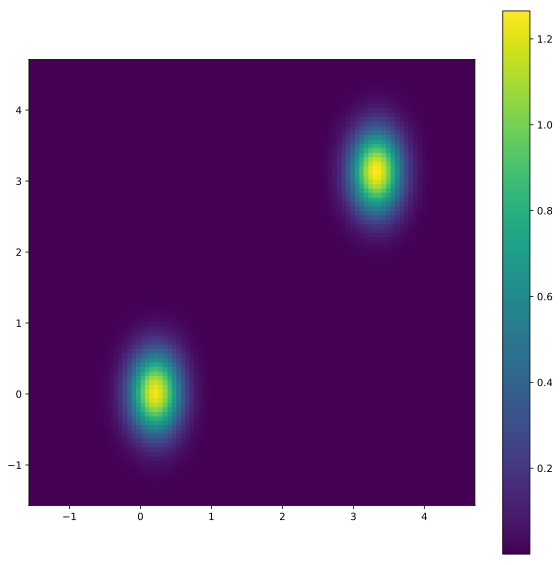

In [10]:
esys = fluxqubit.eigensys()
fluxqubit.plot_wavefunction(esys, which=0, mode='abs')